# Exercise 3. EDA / Python
The purpose of this case study is to test your ability to leverage data to generate useful insights. Attached in THA_Dataset_Data_sample.csv you will find data corresponding to all orders which happened during one week (Delivered and Canceled) in the city of Glovalia with all important time

# Import Libraries

In [1]:
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# other

# Get Data

In [2]:
df = pd.read_csv("THA_Dataset_Data_sample.csv")

In [8]:
df.shape

(2471, 17)

In [3]:
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time
0,53134335,DeliveredStatus,85260.0,18579597,20153483,WALL - Partner,True,BICYCLE,1,6.029,7/13/2019 13:04:44,7/13/2019 13:05:32,7/13/2019 13:06:49,7/13/2019 13:09:13,7/13/2019 13:28:45,7/13/2019 13:46:58,7/13/2019 13:59:49
1,53009545,DeliveredStatus,23517.0,11871195,20153483,WALL - Partner,True,BICYCLE,1,3.998,7/12/2019 20:06:29,7/12/2019 20:10:42,7/12/2019 20:11:02,7/12/2019 20:16:05,7/12/2019 20:23:07,7/12/2019 20:37:53,7/12/2019 20:43:01
2,53129297,DeliveredStatus,18300.0,1053786,20153483,WALL - Partner,True,BICYCLE,1,5.309,7/13/2019 12:14:58,7/13/2019 12:15:44,7/13/2019 12:23:40,7/13/2019 12:45:16,7/13/2019 12:50:09,7/13/2019 12:55:16,7/13/2019 12:59:23
3,53235752,CanceledStatus,85260.0,20466508,20153483,WALL - Partner,True,BICYCLE,1,6.429,7/13/2019 21:55:58,7/13/2019 22:24:58,7/13/2019 22:24:58,NaN,NaN,NaN,7/13/2019 22:25:15
4,53002671,DeliveredStatus,15912.0,16549489,20153483,WALL - Partner,True,BICYCLE,1,3.442,7/12/2019 19:40:13,7/12/2019 19:41:14,7/12/2019 19:42:34,7/12/2019 19:46:28,7/12/2019 19:56:59,7/12/2019 20:07:08,7/12/2019 20:10:37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        2471 non-null   int64  
 1   final_status                              2471 non-null   object 
 2   store_address_id                          2440 non-null   float64
 3   customer_id                               2471 non-null   int64  
 4   courier_id                                2471 non-null   int64  
 5   vertical                                  2471 non-null   object 
 6   is_food                                   2471 non-null   bool   
 7   transport                                 2471 non-null   object 
 8   number_of_assignments                     2471 non-null   int64  
 9   total_real_distance                       2471 non-null   float64
 10  activation_time_local               

<Axes: >

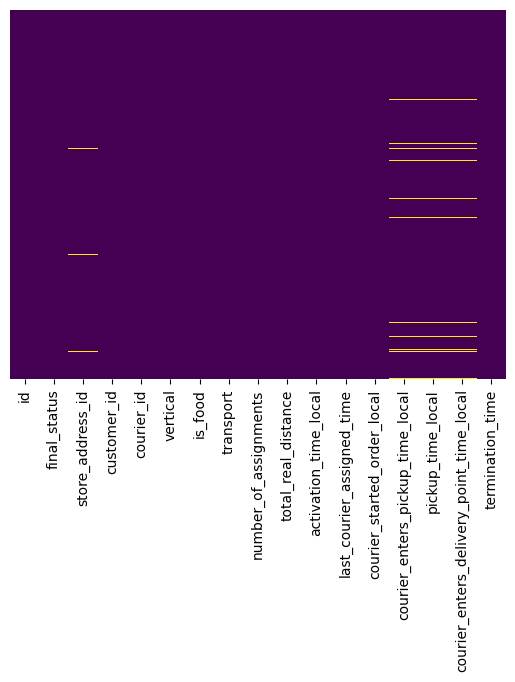

In [5]:
# Nulls
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.isnull().sum()

id                                           0
final_status                                 0
store_address_id                            31
customer_id                                  0
courier_id                                   0
vertical                                     0
is_food                                      0
transport                                    0
number_of_assignments                        0
total_real_distance                          0
activation_time_local                        0
last_courier_assigned_time                   0
courier_started_order_local                  0
courier_enters_pickup_time_local            61
pickup_time_local                           61
courier_enters_delivery_point_time_local    67
termination_time                             0
dtype: int64

In [7]:
# Duplicados
print(f'Number of duplicated rows: {df.duplicated().sum()}')
#df = df.drop_duplicates()
#df.shape

Number of duplicated rows: 0


# Datetime

In [22]:
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time
0,53134335,DeliveredStatus,85260.0,18579597,20153483,WALL - Partner,True,BICYCLE,1,6.029,7/13/2019 13:04:44,7/13/2019 13:05:32,7/13/2019 13:06:49,7/13/2019 13:09:13,7/13/2019 13:28:45,7/13/2019 13:46:58,7/13/2019 13:59:49
1,53009545,DeliveredStatus,23517.0,11871195,20153483,WALL - Partner,True,BICYCLE,1,3.998,7/12/2019 20:06:29,7/12/2019 20:10:42,7/12/2019 20:11:02,7/12/2019 20:16:05,7/12/2019 20:23:07,7/12/2019 20:37:53,7/12/2019 20:43:01
2,53129297,DeliveredStatus,18300.0,1053786,20153483,WALL - Partner,True,BICYCLE,1,5.309,7/13/2019 12:14:58,7/13/2019 12:15:44,7/13/2019 12:23:40,7/13/2019 12:45:16,7/13/2019 12:50:09,7/13/2019 12:55:16,7/13/2019 12:59:23
3,53235752,CanceledStatus,85260.0,20466508,20153483,WALL - Partner,True,BICYCLE,1,6.429,7/13/2019 21:55:58,7/13/2019 22:24:58,7/13/2019 22:24:58,NaN,NaN,NaN,7/13/2019 22:25:15
4,53002671,DeliveredStatus,15912.0,16549489,20153483,WALL - Partner,True,BICYCLE,1,3.442,7/12/2019 19:40:13,7/12/2019 19:41:14,7/12/2019 19:42:34,7/12/2019 19:46:28,7/12/2019 19:56:59,7/12/2019 20:07:08,7/12/2019 20:10:37


In [25]:
df['activation_time_local'] = pd.to_datetime(df['activation_time_local'],format='%m/%d/%Y %H:%M:%S')
df['last_courier_assigned_time'] = pd.to_datetime(df['last_courier_assigned_time'],format='%m/%d/%Y %H:%M:%S')
df['courier_started_order_local'] = pd.to_datetime(df['courier_started_order_local'],format='%m/%d/%Y %H:%M:%S')
df['courier_enters_pickup_time_local'] = pd.to_datetime(df['courier_enters_pickup_time_local'],format='%m/%d/%Y %H:%M:%S')
df['pickup_time_local'] = pd.to_datetime(df['pickup_time_local'],format='%m/%d/%Y %H:%M:%S')
df['courier_enters_delivery_point_time_local'] = pd.to_datetime(df['courier_enters_delivery_point_time_local'],format='%m/%d/%Y %H:%M:%S')
df['termination_time'] = pd.to_datetime(df['termination_time'],format='%m/%d/%Y %H:%M:%S')

ValueError: unconverted data remains when parsing with format "%m/%d/%Y %H:%M:%S": "1", at position 2470. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Based on the data you were given, provide visibility over the following metrics:

In [ ]:
 #final_status                              2471 non-null   object 
 #vertical                                  2471 non-null   object 
 #transport                                 2471 non-null   object 
 #number_of_assignments                     2471 non-null   int64  
 #total_real_distance                       2471 non-null   float64
 #activation_time_local                     2471 non-null   object 
 #last_courier_assigned_time                2471 non-null   object 
 #courier_started_order_local               2471 non-null   object 
 #courier_enters_pickup_time_local          2410 non-null   object 
 #pickup_time_local                         2410 non-null   object 
 #courier_enters_delivery_point_time_local  2404 non-null   object 
 #termination_time 

##  a. Delivery Time

Delivery Time:
Para mi el delivery time corresponde al tiempo desde que se asigna hasta que entra al delivery point:  courier_enters_delivery_point_time_local  - last_courier_assigned_time 

In [17]:
df_delivered = df[df['final_status']=='DeliveredStatus']

In [21]:
df_delivered.isnull().sum()

id                                           0
final_status                                 0
store_address_id                            20
customer_id                                  0
courier_id                                   0
vertical                                     0
is_food                                      0
transport                                    0
number_of_assignments                        0
total_real_distance                          0
activation_time_local                        0
last_courier_assigned_time                   0
courier_started_order_local                  0
courier_enters_pickup_time_local             0
pickup_time_local                            0
courier_enters_delivery_point_time_local     0
termination_time                             0
dtype: int64

In [18]:
df_delivered['delivery_time'] = df_delivered['courier_enters_delivery_point_time_local']-df_delivered['last_courier_assigned_time']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [11]:
df['final_status'].value_counts()

final_status
DeliveredStatus    2389
CanceledStatus       82
Name: count, dtype: int64

In [13]:
df['vertical'].value_counts()
# 1) ALL - Partner: the order was for a store which is our partner (they receive the orders through the partner web-app before the courier arrives there.
# 2) ALL - NonPartner: the order was for a store which we have as “Fake” (we have no agreements with this store, so the courier needs to go inside and order as a regular customer)
# 3) QUIERO: the order was done through the central “Anything” button on the app where customers can ask us to deliver anything that fits into a Glovo backpack. (operationally similar to the WALL-NonPartner)

vertical
WALL - Partner       2411
QUIERO                 30
WALL - NonPartner      29
COURIER                 1
Name: count, dtype: int64

Based on the data you were given, provide visibility over the following metrics: a. Delivery Time b. Delivery Distance c. Reassignment Rate (whenever we need to assign an order to another courier after the first assignment it counts as a reassignment) d. Courier Capacity (how many orders, on average, a courier is able to deliver deliver during 1h of work) e. Waiting time at pickup (time between arrival and the store, “courier_enters_pickup” , and picking up the order, “pickup_time”)

In [14]:
df['transport'].value_counts()

transport
BICYCLE      1255
MOTORBIKE     793
CAR           423
Name: count, dtype: int64

In [ ]:
df['number_of_assignments'].value_counts()
# shows how many times we needed to assign different couriers to the orders

number_of_assignments
1    2129
2     274
3      56
4       9
6       2
5       1
Name: count, dtype: int64

In [16]:
df['total_real_distance'].value_counts()

total_real_distance
3.804     5
8.243     4
2.396     4
2.710     4
3.322     4
         ..
4.896     1
2.934     1
3.517     1
4.337     1
13.913    1
Name: count, Length: 2080, dtype: int64